# Data Analysis

This Jupyter Notebook focuses on Exploratory Data Analysis (EDA) of the 'movies' dataset. It encompasses generating visualizations, exploring different aspects of the dataset, and documenting findings. This project aims to uncover and explain insights into the characteristics, trends, and patterns present in the 'movies' dataset in detail. A comprehensive report on the findings in this Jupyter Notebook can be found in the 'CP3_Wine EDA Task Doc.pdf' document. You can access the report on my GitHub portfolio in the same folder where this notebook is located.

In [185]:
# Import libraries

import numpy as np
import pandas as pd
#import seaborn as sns
import ast, json
import fuzzywuzzy
from fuzzywuzzy import process

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [187]:
# Code here
movies_df.drop(['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline'], axis=1, inplace=True)

#### Remove any duplicate rows

In [188]:
# Code here
movies_df.drop_duplicates()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [189]:
# Code here
# remove rows with revenue = 0
movies_df.drop(movies_df[movies_df['revenue'] == 0].index, inplace = True)

# remove rows with budget = 0
movies_df.drop(movies_df[movies_df['budget'] == 0].index, inplace = True)

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [190]:
# Change the release_date column to DateTime
movies_df['date_parsed'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df['Year'] = movies_df['date_parsed'].dt.strftime('%Y')

# change Year datatype to integer
movies_df['Year'] = movies_df['Year'].str.strip().astype(np.int16)


Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [191]:
# Code here
movies_df['revenue'].astype(np.int64)
movies_df['budget'].astype(np.int64)

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4773        27000
4788        12000
4792        20000
4796         7000
4798       220000
Name: budget, Length: 3229, dtype: int64

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [192]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [193]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,date_parsed,Year
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015-04-01,2015


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [194]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action')]

action_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,date_parsed,Year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009-12-10,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007-05-19,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015-10-26,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012-07-16,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012-03-07,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,230000,"['Drama', 'Action', 'Crime']",18533,18.450613,['United Kingdom'],2008-10-09,2260712,92.0,['English'],Bronson,6.9,733,2008-10-09,2008
4670,400000,"['Adventure', 'Action', 'Thriller', 'Science F...",9659,33.142185,['Australia'],1979-04-12,100000000,93.0,['English'],Mad Max,6.6,1213,1979-04-12,1979
4701,150000,"['Action', 'Drama', 'Romance']",5822,0.132878,['United States of America'],1971-04-23,15200000,97.0,['English'],Sweet Sweetback's Baadasssss Song,4.6,18,1971-04-23,1971
4772,31192,"['Drama', 'Action', 'Comedy']",42151,1.330379,['United Kingdom'],2009-09-01,10000,89.0,['English'],Down Terrace,6.3,26,2009-09-01,2009


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

<ipython-input-195-ca08855eada3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expensive_cheapest, y='title', x='budget', palette = 'bright')


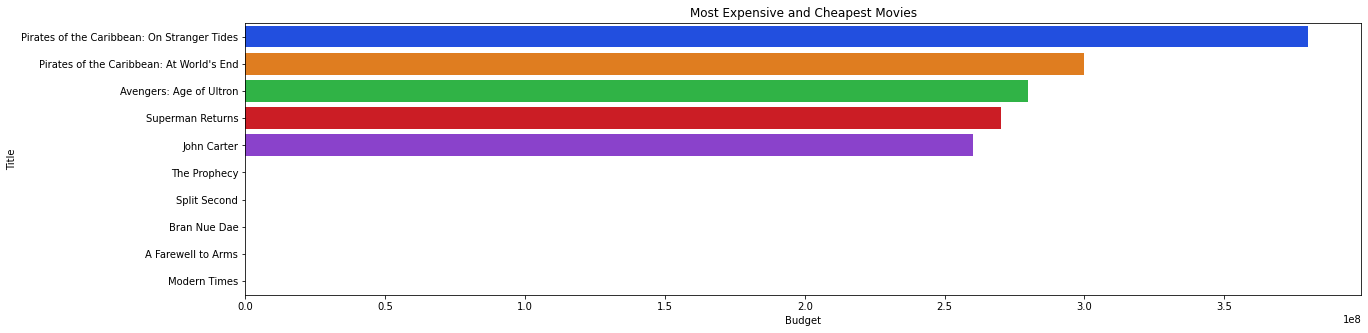

In [195]:
# Code here

# get most expensive movies by sorting according to budget (descending order)
most_expensive = movies_df.sort_values(by='budget', axis=0, ascending=False)

# get cheapest movies by sorting according to budget (ascending order)
cheapest = movies_df.sort_values(by='budget', axis=0, ascending=True)

# create a new dataframe with the top five most expensive and top five cheapest movies.
frames = [most_expensive.iloc[0:5,:], cheapest.iloc[0:5,:]]

# concatenate the dataframes
expensive_cheapest= pd.concat(frames)

# sort the movies in decending order by budgets
expensive_cheapest.sort_values(by='budget', axis=0, ascending=False, inplace=True)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data=expensive_cheapest, y='title', x='budget', palette = 'bright')
plt.xlabel('Budget')
plt.ylabel('Title')
plt.title("Most Expensive and Cheapest Movies")
plt.show()

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

<ipython-input-196-452345cf8f1d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movies_profit, y='title', x='profit', palette = 'pastel')


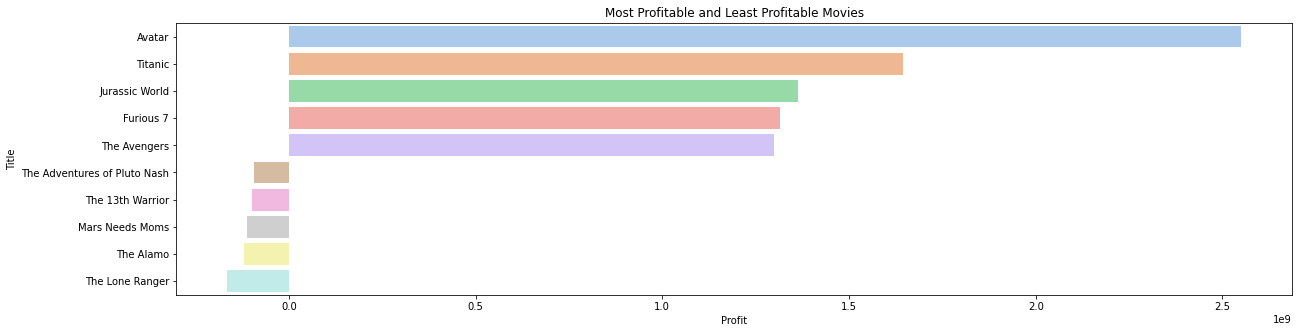

In [196]:
# get movie titles
movies_title = movies_df.title

# calculate the profit column and add it to the movies dataframe
profit = movies_df.revenue - movies_df.budget
movies_df['profit'] = profit

# create most and least profitable temp dataframes
most_profitable = movies_df.sort_values(by='profit', axis=0, ascending=False)
least_profitable = movies_df.sort_values(by='profit', axis=0, ascending=True)

# create a new dataframe with the top five most and least profitable movies.
frames = [most_profitable.iloc[0:5,:], least_profitable.iloc[0:5,:]]

# concatenate the dataframes
movies_profit= pd.concat(frames)

# sort the movies in decending order by profit
movies_profit.sort_values(by='profit', axis=0, ascending=False, inplace=True)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data=movies_profit, y='title', x='profit', palette = 'pastel')
plt.xlabel('Profit')
plt.title("Most Profitable and Least Profitable Movies")
plt.ylabel('Title')
plt.show()

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

<ipython-input-197-2b003d3c1f5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ten_pop, y='title', x='popularity', palette= 'dark')


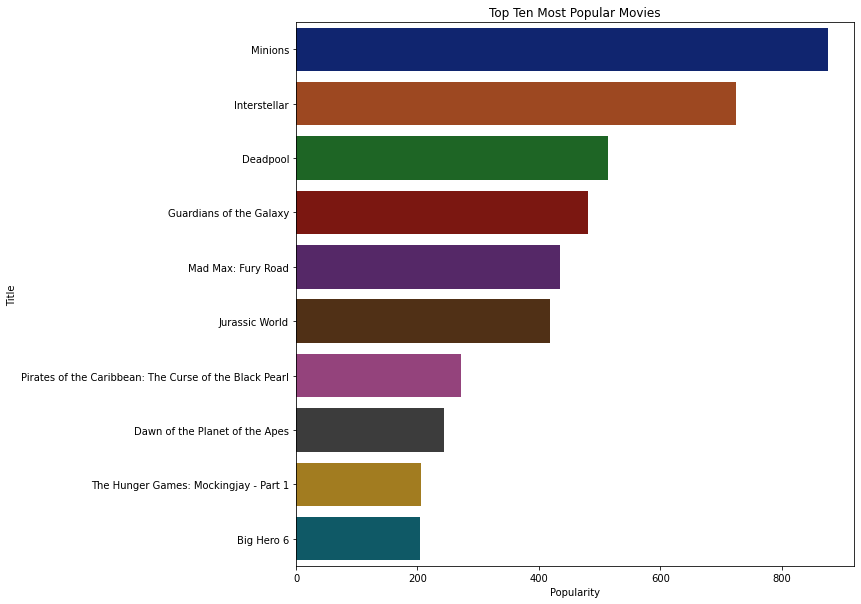

In [197]:
# Code here

# sort new temp dataframe by popularity 
movies_pop = movies_df.sort_values(by='popularity', ascending=False)

# top 10 moat popular movies
top_ten_pop = movies_pop[['title','popularity']].head(10)

# bar plot
plt.figure(figsize=(10,10))
sns.barplot(data=top_ten_pop, y='title', x='popularity', palette= 'dark')
plt.xlabel('Popularity')
plt.ylabel('Title')
plt.title('Top Ten Most Popular Movies')
plt.show()

#### Find Movies which are rated above 7

<ipython-input-198-e99ce7974e6b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fifteen, y='title', x='vote_average', palette = 'deep')


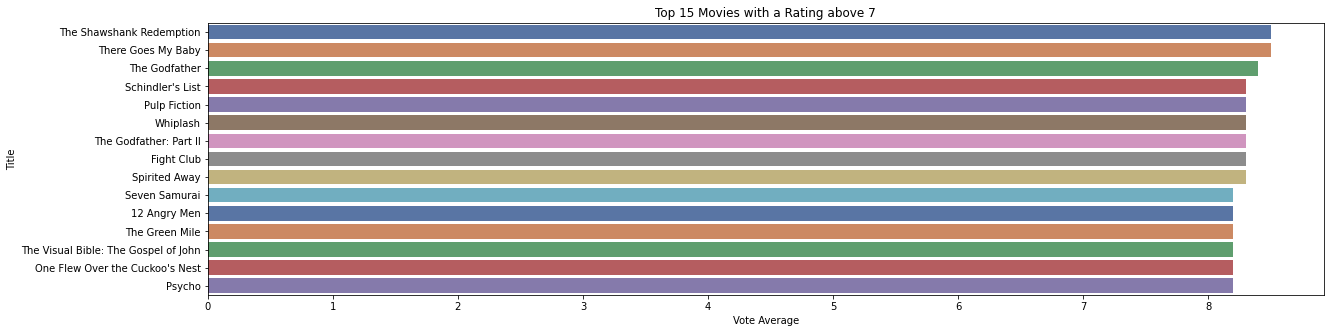

In [198]:
# Code here

# create new temp datdframe for movies with vote_average above 7 
above_seven_rating = movies_df[movies_df.vote_average > 7].sort_values(by='vote_average', ascending=False)

# top 15 movies with a rating above 7
top_fifteen = above_seven_rating[['title','vote_average']].head(15)

# bar plot
plt.figure(figsize=(20,5))
sns.barplot(data=top_fifteen, y='title', x='vote_average', palette = 'deep')
plt.xlabel('Vote Average')
plt.title("Top 15 Movies with a Rating above 7")
plt.ylabel('Title')
plt.show()

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

In [199]:
 # Code here

# we need to expand the data frame and have additional entries for the movies with mutiple genres
movies_genre = movies_df.assign(genres = movies_df['genres'].str.split(','))
movies_genre = movies_genre.explode('genres')

# get the unique genres in the dataframe
genres = movies_genre['genres'].unique()
print(f"Unique genres in the dataframe:\n\n{genres}")

# remove the punctuation marks os it's just the movie genre in the genres column
# function that replaces  rows in the given column of the given DataFrame. 
# If the row entry matchesthe given string above a ratio of 90, it'll be replaced the the given string - fuzzywuzzy library
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    
    # get a list of unique strings (data frame column entries)
    strings = df[column].unique()
    
    # Get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # Get rows of all close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # Replace all rows with close matches with the input 'string_to_match'
    df.loc[rows_with_matches, column] = string_to_match
    
    # Let us know when the function is done
    print("Replacement complete!")


# use replace_matches_in_column function for each unique country string
print() # space
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Action")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Science Fiction")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Thriller")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Western")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="War")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Mystery")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Adventure")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Family")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Fantasy")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Documentary")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Foreign")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="History")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Romance")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Music")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Crime")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Animation")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Fantasy")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Comedy")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Drama")
replace_matches_in_column(df=movies_genre, column='genres', string_to_match="Horror")


# replace '[]' genre in genre's column with 'Unknown'
movies_genre.replace('[]', 'Unknown', inplace=True)

# confirm the unique genres in the dataframe
genres = movies_genre['genres'].unique()
print(f"\nConfirmed unique genres in the dataframe after replacement:\n\n{genres}")

Unique genres in the dataframe:

["['Action'" " 'Adventure'" " 'Fantasy'" " 'Science Fiction']"
 "['Adventure'" " 'Action']" " 'Crime']" " 'Crime'" " 'Drama'"
 " 'Thriller']" "['Fantasy'" " 'Action'" " 'Adventure']" "['Animation'"
 " 'Family']" " 'Fantasy']" " 'Thriller'" " 'Western']" " 'Family'"
 "['Science Fiction'" " 'Comedy'" "['Drama'" " 'Romance'" "['Thriller'"
 " 'Science Fiction'" "['Family'" " 'Comedy']" "['Action']" " 'Horror'"
 " 'Romance']" " 'Animation'" " 'Drama']" "['Science Fiction']"
 "['Comedy'" " 'Mystery'" "['Fantasy']" "['History'" " 'War']" "['War'"
 " 'History'" " 'Mystery']" " 'Animation']" "['Adventure']" "['Comedy']"
 " 'War'" " 'History']" "['Western'" " 'Western'" "['Drama']" " 'Horror']"
 "['Romance'" " 'Music']" "['Crime'" "['Animation']" "['War']"
 "['Mystery'" "['Horror'" " 'Music'" "['Thriller']" "['Music'"
 "['Western']" "['Horror']" "['Music']" "['Romance']" "['Documentary']"
 " 'Documentary'" "['History']" " 'Documentary']" "['Documentary'"
 " 'Fore

<ipython-input-200-f796fc1e3c6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = movies_genre, x = 'genres', order =movies_genre['genres'].value_counts().index, palette = 'rocket')


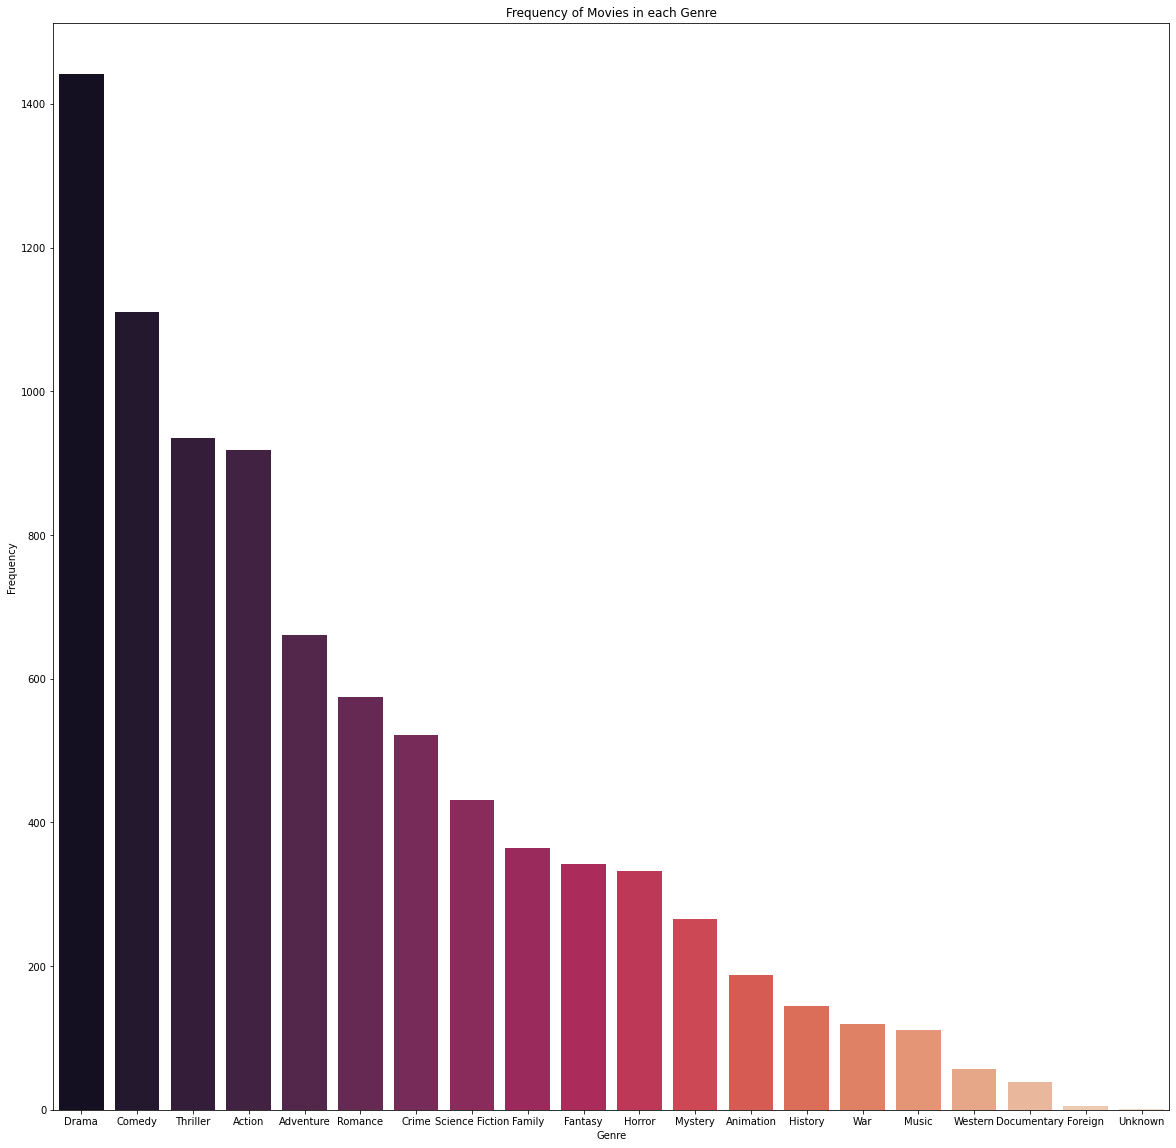

In [200]:
# bar plot of movies frequency by genre
fig = plt.figure(figsize = (20,20))
sns.countplot(data = movies_genre, x = 'genres', order =movies_genre['genres'].value_counts().index, palette = 'rocket')
plt.title('Frequency of Movies in each Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

In [202]:
# Generate three different interesting visualisations with a data story.

### Genre that generates the most revenue

Bar plot showing the revenue generated by genre

<ipython-input-203-f9bb75c8990c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = movies_genre, x = 'genres', y = 'revenue', palette = 'hls')


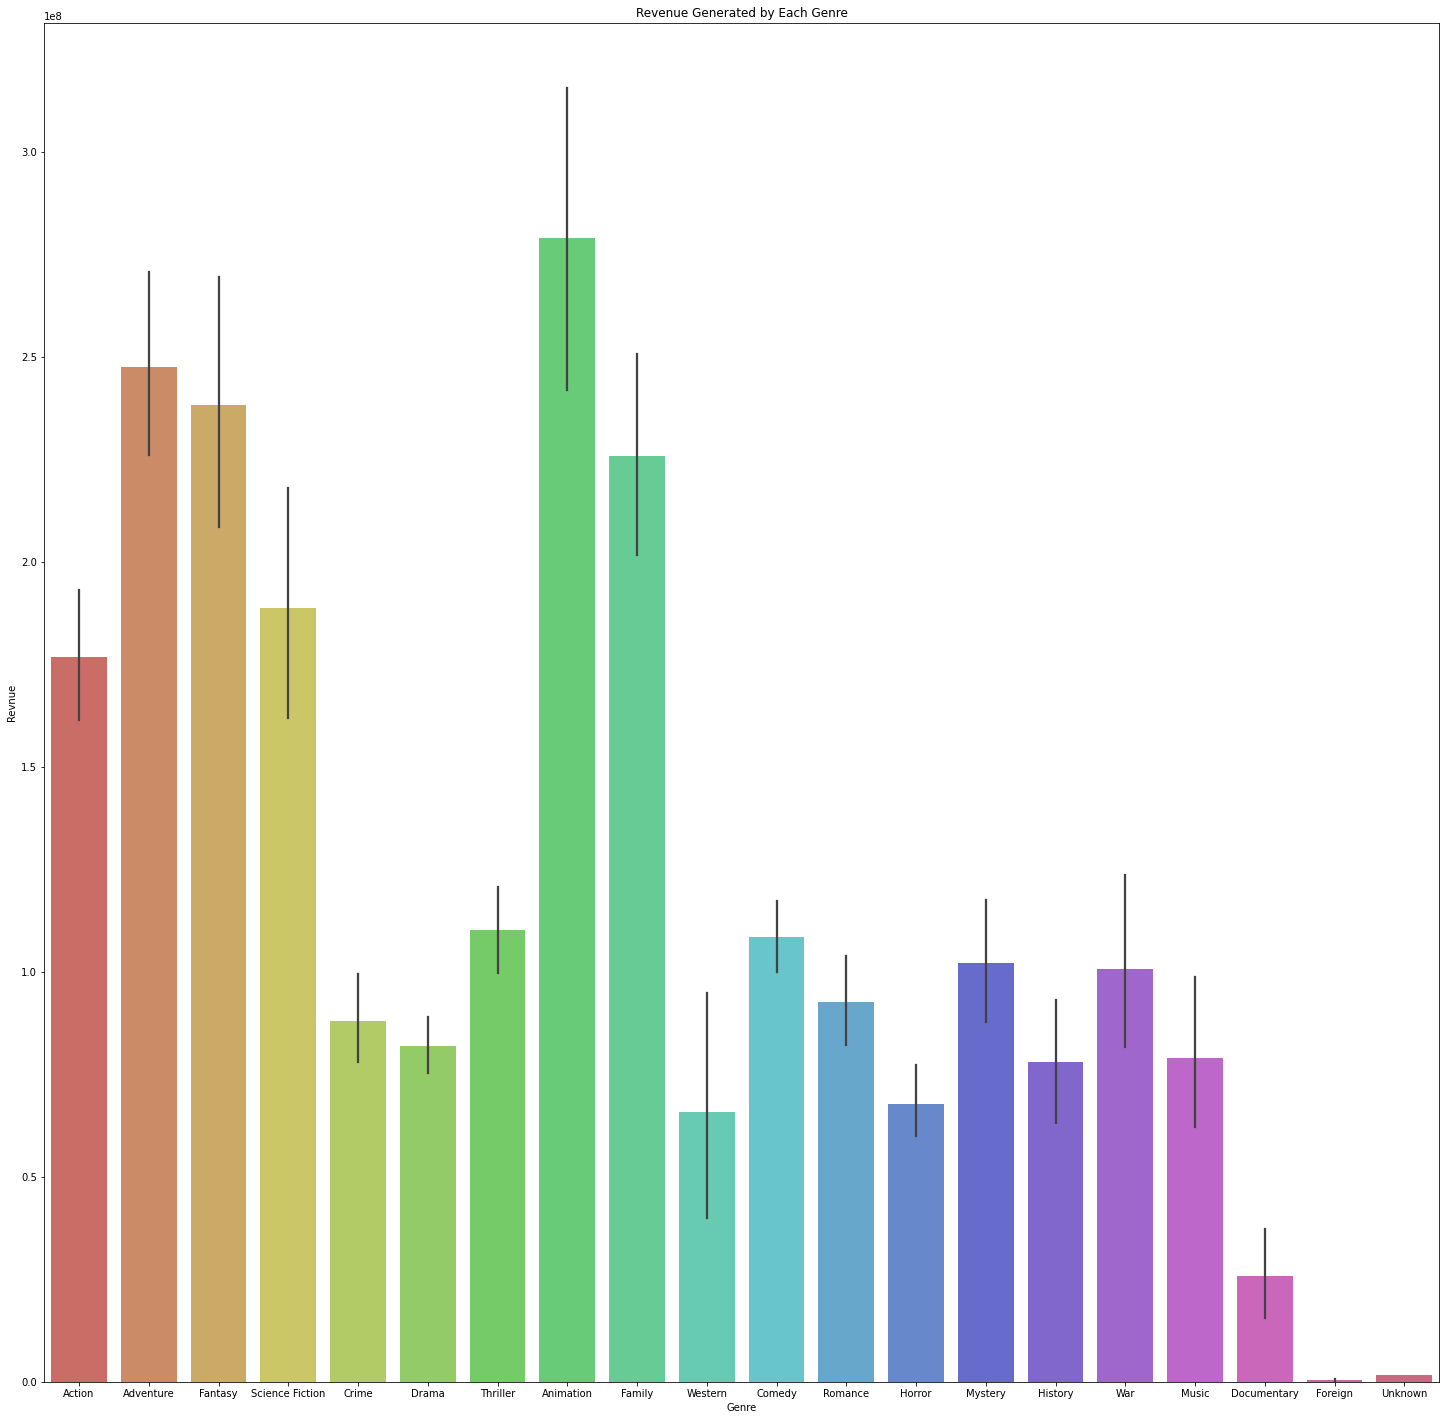

In [203]:
fig = plt.figure(figsize = (25,25))
sns.barplot(data = movies_genre, x = 'genres', y = 'revenue', palette = 'hls')
plt.xlabel('Genre')
plt.ylabel('Revnue')
plt.title('Revenue Generated by Each Genre')
plt.show()


#### Year in which the most revenue was generated

Box and Whisker plot.

<ipython-input-208-d788930241bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ten_yrs,x='Year',y='revenue',palette='viridis',width=0.8)


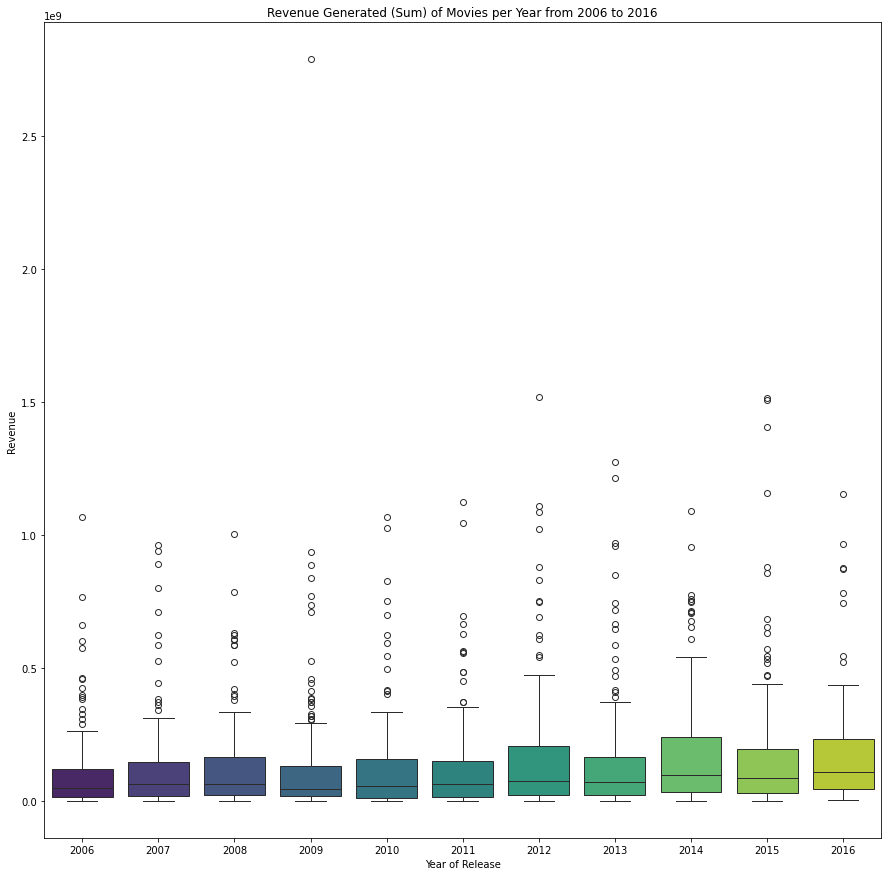

In [208]:
# temp datatfram with years from 2000 to 2016
ten_yrs = movies_df[movies_df.Year >= 2006]

# box and whisker plot
plt.figure(figsize=(15,15))
sns.boxplot(data=ten_yrs,x='Year',y='revenue',palette='viridis',width=0.8)
plt.xlabel('Year of Release')
plt.ylabel('Revenue')
plt.title('Revenue Generated (Sum) of Movies per Year from 2006 to 2016')
plt.show()


#### Revenue vs Runtime

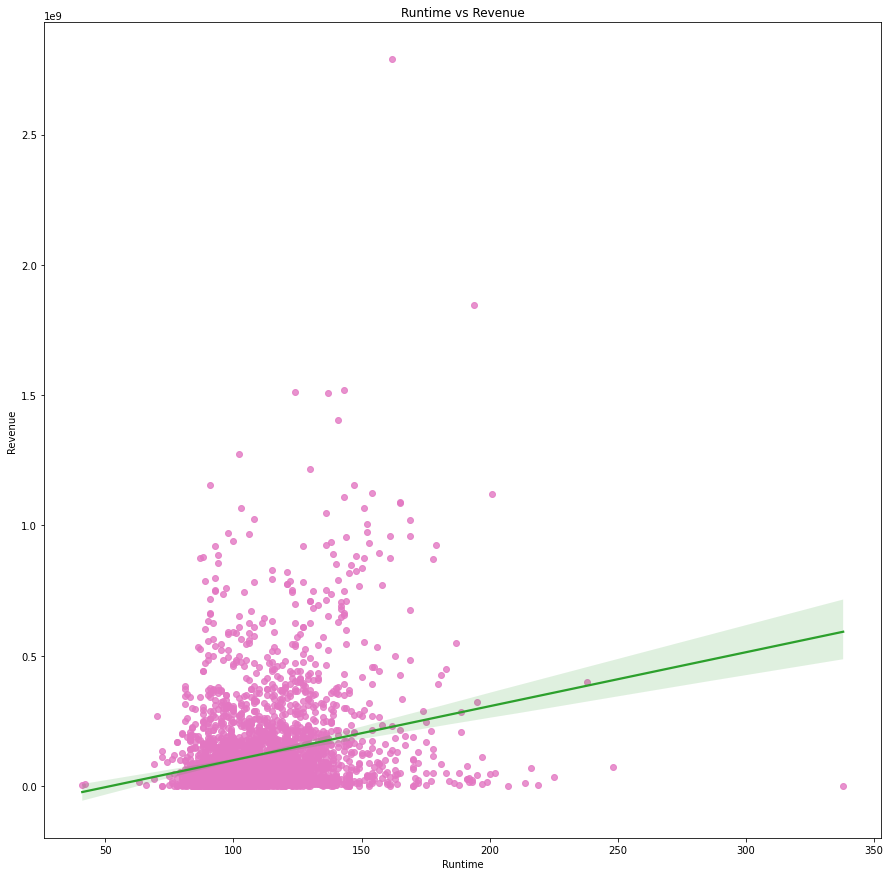

In [70]:
fig = plt.figure(figsize=(15, 15))
sns.regplot(data=movies_df, x="runtime", y="revenue", scatter_kws=dict(color="C6"), line_kws=dict(color="C2"))
plt.xlabel("Runtime")
plt.ylabel("Revenue")
plt.title("Runtime vs Revenue")
plt.show()

# save the figure to desktop
plt.savefig(output_path)